In [1]:
'''Let\'s load and look at the data file'''
import pandas as pd
import numpy as np
df_regents_full = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df_regents_full.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [3]:
'''We see an dataset covering a number of years 
   for different schools and levels with scoring stats for different exams.
   First, Let\'s see general info about the dataset.'''

df_regents_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [2]:
'''We have 212331 lines, and data in every column is stored as object
   except for Year and Total Tested which are stored as integers.

   Next, let\'s see a general description to see how many unique values '''

df_regents_full.describe(include='object')

,School DBN,School Name,School Level,Regents Exam,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331,212331,212331,212321,212331,212331,212331,212331,212331,212331,212331,212331,212331
unique,1018,1012,6,14,748,446,992,945,992,744,1000,707,999
top,26Q430,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,s,s,s,s,s,s,s,na,na
freq,490,1337,151160,29254,75222,75222,75222,75222,75222,75222,75222,142680,142680


In [4]:
'''We see over 1000 unique school DBNs and slightly fewer names.
   We see 6 unique school levels and 14 unique exams, with the most common values
   being High school and Common Core Algebra, respectively.
   This also tells us that an \'s\' entry in the score data columns is the most 
   frequently occurring at 75222/212331 = 35.4% of our total set. That seems like a lot!

   Next, let\'s get an idea of null values'''

df_regents_full.isnull().sum()

School DBN                      0
School Name                     0
School Level                    0
Regents Exam                   10
Year                            0
Total Tested                    0
Mean Score                      0
Number Scoring Below 65         0
Percent Scoring Below 65        0
Number Scoring 65 or Above      0
Percent Scoring 65 or Above     0
Number Scoring 80 or Above      0
Percent Scoring 80 or Above     0
Number Scoring CR               0
Percent Scoring CR              0
dtype: int64

In [5]:
'''Out of curiosity, I want to see if there\'s consistency in 
   those rows with null values for Regents Exam'''

df_regents_full[df_regents_full['Regents Exam'].isnull()]

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61,67.8,29,32.2,6,6.7,0,0
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55,67.9,26,32.1,5,6.2,0,0
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6,66.7,3,33.3,1,11.1,0,0
100865,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,5,s,s,s,s,s,s,s,na,na
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34,63,20,37,6,11.1,0,0
100867,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,31,s,s,s,s,s,s,s,na,na
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34,63,20,37,5,9.3,0,0
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27,75,9,25,1,2.8,0,0
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59,9,75,3,25,1,8.3,0,0
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52,66.7,26,33.3,5,6.4,0,0


In [14]:
'''It looks like this was one school in one year, so I\'ll fill in
   with a value of Unknown'''

df_regents_full = df_regents_full.fillna(value='Unknown')

In [10]:
'''To pick a school to compare, I\'m going to use the .sample() method'''

df_regents_full.sample(n=1).iloc[0]

School DBN                                              28Q350
School Name                    Jamaica Gateway to the Sciences
School Level                                       High school
Regents Exam                                           English
Year                                                      2015
Total Tested                                                73
Mean Score                                                74.2
Number Scoring Below 65                                     14
Percent Scoring Below 65                                  19.2
Number Scoring 65 or Above                                  59
Percent Scoring 65 or Above                               80.8
Number Scoring 80 or Above                                  30
Percent Scoring 80 or Above                               41.1
Number Scoring CR                                           41
Percent Scoring CR                                        56.2
Name: 132458, dtype: object

In [12]:
'''Nice! So, I\ll be looking at the school with DBN 28Q350. 
   Let me see how this school\'s data look'''

df_regents_full[df_regents_full['School Name'].str.contains('Jamaica Gateway')].describe(include='object')

,School DBN,School Name,School Level,Regents Exam,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,476,476,476,476,476,476,476,476,476,476,476,476,476
unique,1,1,1,14,220,60,235,105,235,69,211,67,139
top,28Q350,Jamaica Gateway to the Sciences,High school,Common Core Algebra,s,s,s,s,s,s,s,na,na
freq,476,476,476,39,131,131,131,131,131,131,131,306,306


In [16]:
'''For the purposes of my analysis I think I want to just compare 
   Percent Scoring 65 or Above so I will create a dataframe object
   with just that score column with the school identifiers and exams'''

df_regents_sub = df_regents_full[['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Percent Scoring 65 or Above']]
df_regents_sub.describe(include='object')

,School DBN,School Name,School Level,Regents Exam,Percent Scoring 65 or Above
count,212331,212331,212331,212331,212331
unique,1018,1012,6,15,992
top,26Q430,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,s
freq,490,1337,151160,29254,75222


In [17]:
df_regents_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212331 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Percent Scoring 65 or Above  212331 non-null  object
dtypes: int64(2), object(5)
memory usage: 11.3+ MB


In [18]:
'''I see that s value is still the most frequently occurring 
   in about 75222/212331 = 35.4% of my rows. That\s a lot!
   
   Let me see in my subset the ratio of tests that is.'''

s1 = df_regents_sub[df_regents_sub['Percent Scoring 65 or Above'] == 's'].groupby(['Regents Exam'])['Total Tested'].sum()
s2 = df_regents_sub[df_regents_sub['Percent Scoring 65 or Above'] != 's'].groupby(['Regents Exam'])['Total Tested'].sum()
s1/(s1+s2)

Regents Exam
Algebra2/Trigonometry              0.138559
Common Core Algebra                0.053223
Common Core Algebra2               0.135346
Common Core English                0.045513
Common Core Geometry               0.075022
English                            0.066415
Geometry                           0.095828
Global History and Geography       0.028530
Integrated Algebra                 0.077704
Living Environment                 0.046445
Physical Settings/Chemistry        0.138624
Physical Settings/Earth Science    0.070377
Physical Settings/Physics          0.167690
U.S. History and Government        0.044402
Unknown                            0.080000
Name: Total Tested, dtype: float64

In [19]:
'''I don\t know what the s value means and it seems to 
   show up for almost 10 percent of tests. That said, I need to have numbers 
   to make a comparison. I\m going to make a risky decision and filter out the rows.'''

df_regents = df_regents_sub[df_regents_sub['Percent Scoring 65 or Above'] != 's']
df_regents['Percent Scoring 65 or Above'] = pd.to_numeric(df_regents['Percent Scoring 65 or Above'])
df_regents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137109 entries, 1 to 212325
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   137109 non-null  object 
 1   School Name                  137109 non-null  object 
 2   School Level                 137109 non-null  object 
 3   Regents Exam                 137109 non-null  object 
 4   Year                         137109 non-null  int64  
 5   Total Tested                 137109 non-null  int64  
 6   Percent Scoring 65 or Above  137109 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.4+ MB


/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_3562/2926966245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regents['Percent Scoring 65 or Above'] = pd.to_numeric(df_regents['Percent Scoring 65 or Above'])


In [23]:
'''Now I\ll create a subset that just has my school to compare'''

df_jg = df_regents[df_regents['School DBN'] == '28Q350']
df_jg.describe()

,Year,Total Tested,Percent Scoring 65 or Above
count,345.000000,345.000000,345.000000
mean,2015.921739,55.657971,63.189855
std,0.826324,40.856372,21.441962
min,2015.000000,6.000000,0.000000
25%,2015.000000,20.000000,49.200000
50%,2016.000000,50.000000,67.300000
75%,2017.000000,79.000000,79.400000
max,2017.000000,168.000000,100.000000


In [26]:
'''Simple comparison of average of percent of passing tests'''

average_full = format(df_regents['Percent Scoring 65 or Above'].mean(), ".2f")
average_jg = format(df_jg['Percent Scoring 65 or Above'].mean(), ".2f")
print('The average of all tests scoring 65 or above is: ', average_full, '%')
print('The average of Jamaica Gateway tests scoring 65 or above is: ', average_jg, '%')

The average of all tests scoring 65 or above is:  58.07 %
The average of Jamaica Gateway tests scoring 65 or above is:  63.19 %


/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_3562/379764878.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  area_plot.figure.show()


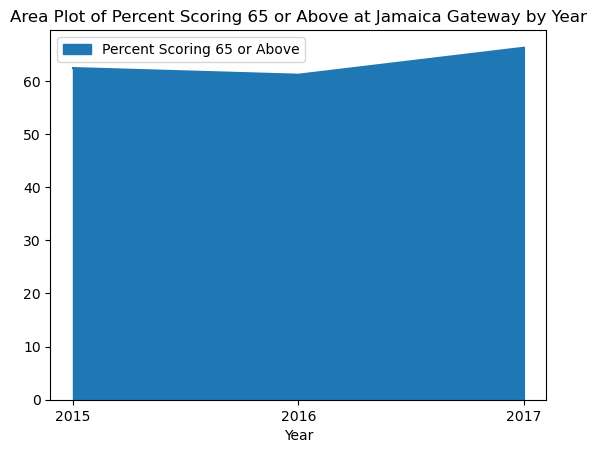

In [28]:
'''I\m afraid I went to ChatGPT for help with the visualization'''

# Prepare data for area plot
area_df = df_jg.pivot_table(index='Year', values='Percent Scoring 65 or Above', aggfunc='mean')

# Area plot
area_plot = area_df.plot.area(title='Area Plot of Percent Scoring 65 or Above at Jamaica Gateway by Year')

# Ensure x-axis increments are whole numbers
area_plot.set_xticks(area_df.index)

# Show the plot (Note: This requires matplotlib behind the scenes)
area_plot.figure.show()

/var/folders/7h/s835_rfs5hq90_9k1clks2vw0000gn/T/ipykernel_3562/943509174.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  area_plot1.figure.show()


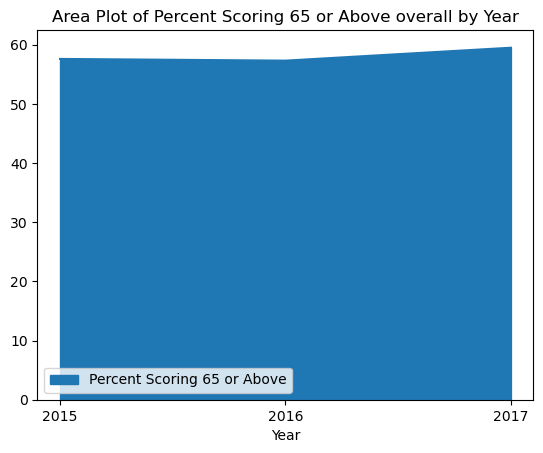

In [31]:
'''I was hoping to get an unstacked histogram so we could see for each year
   how the percentage passing for Jamaica Gateway compared to the total set
   percentage passing. I settled for two different area plots. It\s not ideal.'''

# Prepare data for area plot
area_df1 = df_regents.pivot_table(index='Year', values='Percent Scoring 65 or Above', aggfunc='mean')

# Area plot
area_plot1 = area_df1.plot.area(title='Area Plot of Percent Scoring 65 or Above overall by Year')

# Ensure x-axis increments are whole numbers
area_plot1.set_xticks(area_df1.index)

# Show the plot (Note: This requires matplotlib behind the scenes)
area_plot1.figure.show()

In [ ]:
'''Overall, we see that Jamaica Gateway outperforms the total
   dataset when it comes to percentage of passing tests. We can
   also see a sharper increase in the percentage passing between 
   2016 and 2017 for J'''